
# Project: No-Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


<a id='intro'></a>
## Introduction to the dataset

> **No-Show Appointments Dataset**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

## Questions to ask

> **Question 1**: What is the most important factor for us to know in order to predict if a patient will show up for their scheduled appointment? 
>
> **Question 2**: Are there any patients that cancel (No-show) the appointment if it was on the same day of booking?
>
> **Question 3**: How does the appointment day influence showing/no showing the patient?
>
> **Question 4**: Does sending sms to the patient influence its showing on the appointment?
>

<a id='wrangling'></a>
## Data Wrangling


In [2]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> We notice that there are no missing values in this dataset.

In [5]:
for col in df.columns:
    print(col,type(df[col][0]))

PatientId <class 'numpy.float64'>
AppointmentID <class 'numpy.int64'>
Gender <class 'str'>
ScheduledDay <class 'str'>
AppointmentDay <class 'str'>
Age <class 'numpy.int64'>
Neighbourhood <class 'str'>
Scholarship <class 'numpy.int64'>
Hipertension <class 'numpy.int64'>
Diabetes <class 'numpy.int64'>
Alcoholism <class 'numpy.int64'>
Handcap <class 'numpy.int64'>
SMS_received <class 'numpy.int64'>
No-show <class 'str'>


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> We notice that only about 10% of patients have scholarship,
>
>Average age of patients is around 37 yeasrs old,
>
>Around 32% of patients receive SMS before appointment to confirm booking.

In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> We notice that some patients have more that one appointment, and since we are concerned with the appointment itself, we assume that we don't need patient Id and appointment Id, so we will neglect them.



### Data Cleaning

#### Dropping columns (patient ID, Appointment ID, Neighbourhood) >> I think they are not useful

In [8]:
df.drop(["PatientId", "AppointmentID", "Neighbourhood" ], axis = 1, inplace = True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No


#### Renaming Columns with lower case letters and (_)

In [9]:
df.rename(columns = lambda x : x.strip().lower().replace("-","_"), inplace=True)
df.head(1)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No


#### Convert scheduled day and appointment day to date time foramt (instead of string)

In [10]:
df.scheduledday = pd.to_datetime(df.scheduledday)
df.appointmentday = pd.to_datetime(df.appointmentday)
df.head()

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,No


#### Handling missing values

In [11]:
df[df.isnull().sum(axis=1) > 0].shape

(0, 11)

>We notice that there are no missing values (null values) in this dataset.

#### Checking for duplicates

In [12]:
sum(df.duplicated())

722

>number of duplicated rows = 722 ! So we will drop them.

In [13]:
df.drop_duplicates(inplace = True)
df.shape
df.head()

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,No


#### Converting No_show feature to be boolean (0 or 1) instead of string

In [14]:
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})
df.head()
#notice that 0 = showed/appeared on the appointment

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,0


#### Let's check different values of different columns

In [15]:
df.age.value_counts()

 0      3529
 1      2271
 52     1738
 49     1645
 53     1641
 38     1624
 56     1623
 2      1614
 59     1612
 50     1600
 57     1597
 36     1567
 51     1561
 19     1533
 39     1525
 54     1522
 33     1516
 37     1516
 34     1516
 6      1511
 3      1509
 30     1505
 32     1488
 17     1482
 5      1482
 44     1474
 18     1471
 58     1458
 46     1451
 45     1450
        ... 
 74      601
 76      570
 78      541
 75      540
 77      525
 80      509
 81      430
 82      391
 79      389
 84      310
 83      278
 85      274
 86      256
 87      184
 89      172
 88      125
 90      109
 92       84
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       4
 100       3
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

> We notice that there is a negative age, so let's drop rows that contain negative age.

In [16]:
negative_age_rows = df[df.age < 0]
df.drop(negative_age_rows.index, inplace=True)
df.age.value_counts()

0      3529
1      2271
52     1738
49     1645
53     1641
38     1624
56     1623
2      1614
59     1612
50     1600
57     1597
36     1567
51     1561
19     1533
39     1525
54     1522
33     1516
34     1516
37     1516
6      1511
3      1509
30     1505
32     1488
17     1482
5      1482
44     1474
18     1471
58     1458
46     1451
45     1450
       ... 
72      614
74      601
76      570
78      541
75      540
77      525
80      509
81      430
82      391
79      389
84      310
83      278
85      274
86      256
87      184
89      172
88      125
90      109
92       84
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       4
100       3
102       2
99        1
Name: age, Length: 103, dtype: int64

In [17]:
df.scholarship.value_counts()

0    99005
1    10799
Name: scholarship, dtype: int64

In [18]:
df.hipertension.value_counts()

0    88130
1    21674
Name: hipertension, dtype: int64

In [19]:
df.diabetes.value_counts()

0    101911
1      7893
Name: diabetes, dtype: int64

In [20]:
df.alcoholism.value_counts()

0    106460
1      3344
Name: alcoholism, dtype: int64

In [21]:
df.handcap.value_counts()

0    107585
1      2023
2       182
3        11
4         3
Name: handcap, dtype: int64

>We notice that there are different values for handicaps, which refer to the number of handicaps the patient has, which is not important for us becaues we are only concerned whether the patient is handicapped or not, so we convert it to 0/1 for handicapped or not.

In [22]:
df.loc[df.handcap > 1, 'handcap'] = 1
df.handcap.value_counts()

0    107585
1      2219
Name: handcap, dtype: int64

#### Adding a column that contains days of the week of the appointment

In [23]:
df["appointmentday_week"] = df.appointmentday.map(lambda x : x.day_name())
df.head(1)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointmentday_week
0,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,0,Friday


> To anser the second question, we need to know the time that the patient wait till the appointment day.
>
#### Adding a column for waiting days

In [24]:
delta = df.appointmentday - df.scheduledday
df["waiting_days"]= delta.abs().dt.days.astype(int)
df.head(10)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointmentday_week,waiting_days
0,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,0,Friday,0
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,0,Friday,0
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,0,Friday,0
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,0,Friday,0
4,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,0,Friday,0
5,F,2016-04-27 08:36:51,2016-04-29,76,0,1,0,0,0,0,0,Friday,1
6,F,2016-04-27 15:05:12,2016-04-29,23,0,0,0,0,0,0,1,Friday,1
7,F,2016-04-27 15:39:58,2016-04-29,39,0,0,0,0,0,0,1,Friday,1
8,F,2016-04-29 08:02:16,2016-04-29,21,0,0,0,0,0,0,0,Friday,0
9,F,2016-04-27 12:48:25,2016-04-29,19,0,0,0,0,0,0,0,Friday,1


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: What is the most important factor for us to know in order to predict if a patient will show up for their scheduled appointment?

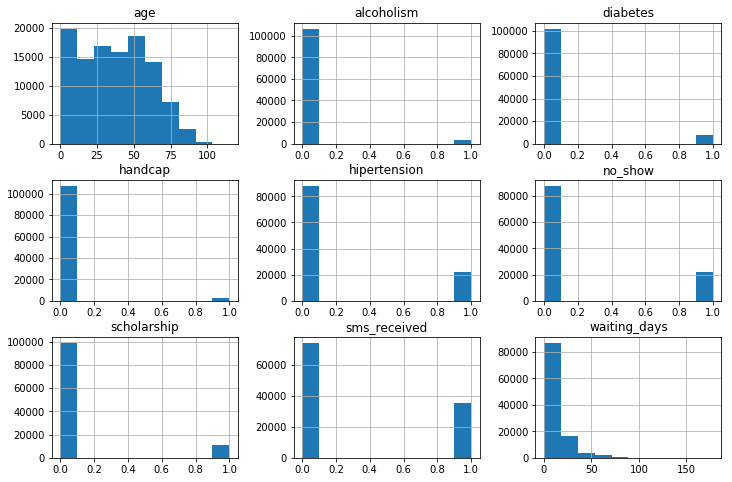

In [25]:
df.hist(figsize=(12,8));

##### Some conclusions from these histograms:
> 1- Most patients are below 65 years old.
> 
> 2- Most patients don't suffer from alcoholism, diabetes, handcap or hipertension.
>
> 3- Most patients show on appointment.
>
> 4- Most patients don't have a scholarship.
>
> 5- Most patients didn't recieve a sms to confirm booking or remind them.
>
> 6- Most petients didn't wait more than 15 days before appointment.
>
> => From these histograms we can conclude that: age, sms and waiting days are the most important factors and the 3 independent factors to show or no show on the appointment (they have the most variety histograms distributions)
>
#### Now we will look at each variable and its relation with no_show column:

##### Gender

In [26]:
#mean of patients who no-showed of each gender
df.groupby("gender").no_show.mean()

gender
F    0.202373
M    0.197938
Name: no_show, dtype: float64

In [27]:
matrix =pd.crosstab(df["gender"],df['no_show'])
matrix

no_show,0,1
gender,,
F,56941,14447
M,30812,7604


In [28]:
matrix.div(matrix.sum(1).astype(float), axis=0)

no_show,0,1
gender,,
F,0.797627,0.202373
M,0.802062,0.197938


Text(0, 0.5, 'no_show')

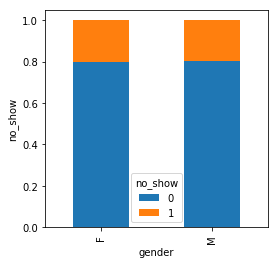

In [45]:
matrix.div(matrix.sum(1).astype(float), axis=0).plot(kind="bar",  stacked=True, figsize=(4,4));
plt.ylabel("no_show")

> We notice that around 0.2 of patients of each gender doesn't show on appointments. So the gender is not so much important.

##### Age

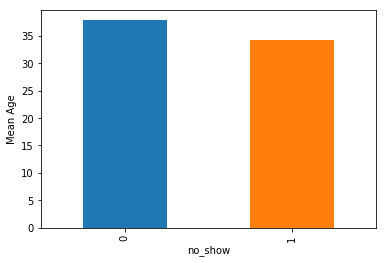

In [30]:
df.groupby("no_show").age.mean().plot.bar();
plt.ylabel('Mean Age');

> We notice that mean age of people who didn't show is less than who show on appointment.

##### SMS

In [31]:
matrix_sms =pd.crosstab(df["sms_received"],df['no_show'])
matrix_sms.div(matrix_sms.sum(1).astype(float), axis=0)

no_show,0,1
sms_received,,
0,0.834925,0.165075
1,0.724295,0.275705


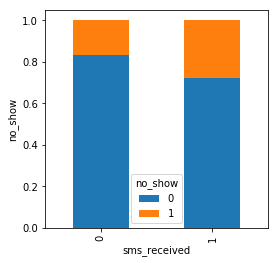

In [32]:
matrix_sms.div(matrix_sms.sum(1).astype(float), axis=0).plot(kind="bar",stacked= True, figsize=(4,4));
plt.ylabel("no_show");

> We conclude that: sms is not a big factor of showing on appointment as percentage of people who did not received a sms and attended the appointment is bigger than percentage of people who received a sms and attended on time!

##### Waiting days

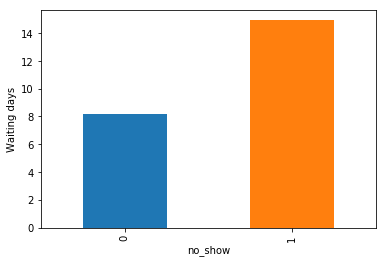

In [33]:
df.groupby("no_show").waiting_days.mean().plot.bar();
plt.ylabel('Waiting days');

> Waiting days is an important factor of showing on appointment, we see that the mean waiting days of people who attended the appointment is less that who didn't attend it. So fewer waiting days means bigger chance of attending the appointment. I think it's the most important factor of showing or no showing on the appointment.

#### Alcoholism

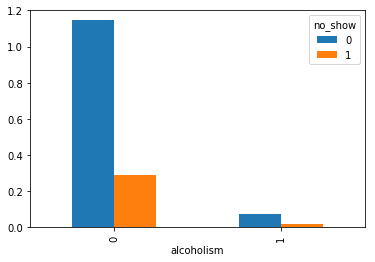

In [43]:
#alcoholism
matrix_alcoholism =pd.crosstab(df["alcoholism"],df['no_show'])
matrix_alcoholism.div(matrix_sms.sum(1).astype(float), axis=0).plot.bar();




### Question 2: Are there any patients that cancel (No-show) the appointment if it was on the same day of booking?

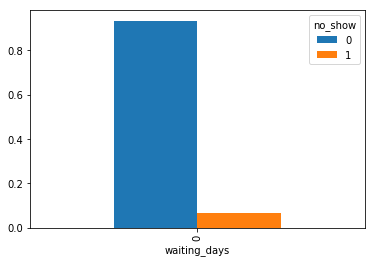

In [34]:
df_nowaiting = df[df.waiting_days == 0]
matrix_nowaiting =pd.crosstab(df_nowaiting["waiting_days"],df['no_show'])
matrix_nowaiting.div(matrix_nowaiting.sum(1).astype(float), axis=0).plot.bar();

> Around 5% only of patients didn't show on appointment although they booked on the same day.

### Question 3: How does the appointment day influence showing/no showing the patient?

In [35]:
daydf = df.groupby("appointmentday_week").no_show.mean()
daydf

appointmentday_week
Friday       0.210851
Monday       0.205158
Saturday     0.230769
Thursday     0.192765
Tuesday      0.199584
Wednesday    0.196236
Name: no_show, dtype: float64

> We notice that, Saturday has the largest ratio of patients who doesn't show on appointment, while patients often show on Thursday.

### Question 4: Does sending sms to the patient influence its showing on the appointment?

In [36]:
smsdf = df.groupby("sms_received").no_show.mean()
smsdf

sms_received
0    0.165075
1    0.275705
Name: no_show, dtype: float64

> Percentage of patients who received the message and didn't show is bigger than percentage of patients who didn't show after not receiving the message, So the message is not a factor.

<a id='conclusions'></a>
## Conclusions

> 1- Mean age of people who didn't show is less than who show on appointment.
>
> 2- Most patients didn't receive a message as a reminder.
>
> 3- Average waiting days is 15 days before appointment day.
>
> 4- 5% only of patients who booked on the same day didn't show on appointment.
>
> 5- "Thursday, Tuesday, Wednesday" are the days most of patients show on them, so patients prefer to go to appointments on working days more than weekend days.

## Limitations

> 1- Number of sms the patient receive is not mentioned, so we don't know how many messages do he need to make him show on appointment.
>
> 2- There are several diseases not mentioned.